## Portfolio Management Lecture 01
### Fundamentals of Risk & Return

In [2]:
# Importing the required libraries
import numpy as np # Basic operations
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization 
from openbb import obb # Market Data Retrieval
obb.user.preferences.output_type = 'dataframe'

### Getting Market Data

In [ ]:
data = obb.equity.price.historical('SPY,^RUT',
                                  start_date = '2000-01-01',
                                  end_date = '2025-01-01',
                                  provider = 'yfinance')
data.head() 

,open,high,low,close,volume,dividend,symbol
date,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,8164300,0.0,SPY
2000-01-03,504.760010,510.959991,489.950012,496.420013,931800000,0.0,^RUT
2000-01-04,143.531250,144.062500,139.640625,139.750000,8089800,0.0,SPY
2000-01-04,497.049988,497.049988,478.200012,478.380005,1009000000,0.0,^RUT
2000-01-05,139.937500,141.531250,137.250000,140.000000,12177900,0.0,SPY


In [7]:
# Data Manipulation 
prices = data.pivot(columns = 'symbol', values = 'close')
prices.columns = ['S&P 500', 'Russell 2000']
prices.head()

,S&P 500,Russell 2000
date,,
2000-01-03,145.4375,496.420013
2000-01-04,139.7500,478.380005
2000-01-05,140.0000,478.829987
2000-01-06,137.7500,475.339996
2000-01-07,145.7500,488.309998


In [15]:
# Computing Financial Returns 
rets = prices.pct_change()[1:]
rets 

,S&P 500,Russell 2000
date,,
2000-01-04,-0.039106,-0.036340
2000-01-05,0.001789,0.000941
2000-01-06,-0.016071,-0.007289
2000-01-07,0.058076,0.027286
2000-01-10,0.003431,0.027810
...,...,...
2024-12-24,0.011115,0.010016
2024-12-26,0.000067,0.009001
2024-12-27,-0.010527,-0.015613


In [42]:
# Computing total return
total_return = (1+rets).cumprod() -1 

print(
    f"""
      The Total Return for the S&P 500 is: {total_return['S&P 500'][-1]}
      The Total Return for the Russell 2000 is: {total_return['Russell 2000'][-1]}
      """
      )


      The Total Return for the S&P 500 is: 3.0297723564406835
      The Total Return for the Russell 2000 is: 3.4924859026338018
      


/tmp/ipykernel_87449/4019826018.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  The Total Return for the S&P 500 is: {total_return['S&P 500'][-1]}
/tmp/ipykernel_87449/4019826018.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  The Total Return for the Russell 2000 is: {total_return['Russell 2000'][-1]}


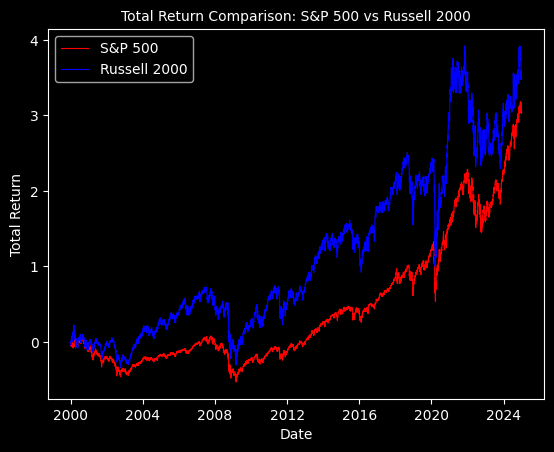

In [57]:
# Visualizing the Total Return
plt.plot(total_return['S&P 500'],
         label='S&P 500',
         linewidth= 0.8,
         color='red')

plt.plot(total_return['Russell 2000'],
         label='Russell 2000',
         linewidth= 0.8,
         color='blue')


plt.title('Total Return Comparison: S&P 500 vs Russell 2000', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.style.use('dark_background')
plt.legend() 

In [45]:
# Computing Annualized Returns
n_obs = rets.shape[0]
annualized_ret = (rets+1).prod()**(252/n_obs) - 1
annualized_ret

S&P 500         0.057444
Russell 2000    0.062061
dtype: float64

In [46]:
# Computing Annualized Vol 
n = 252 
annualized_vol = rets.std() * np.sqrt(n)
annualized_vol 

S&P 500         0.194292
Russell 2000    0.244441
dtype: float64

In [ ]:
# Computing risk-adjusted return 
rfr = 0.02 # Risk-Free Rate 
sharpe_ratio = (annualized_ret - rfr) / annualized_vol 
sharpe_ratio  

S&P 500         0.192721
Russell 2000    0.172068
dtype: float64